In [1]:
import os
import glob
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

source of files: https://portalsivigila.ins.gov.co/Paginas/Buscador.aspx

# Dengue

In [51]:
# read files
folder_path = "Dengue"  # Adjust this to your folder path

files_dengue = [file_path for file_path in glob.glob(os.path.join(folder_path, "*")) if os.path.isfile(file_path)]

In [3]:
# Assuming files_dengue is a list of file paths to Excel files
dataframes = []
cols_to_keep = ['SEMANA', 'ANO', 'Estado_final_de_caso']

for file in tqdm(files_dengue):
    try:
        df_temp = pd.read_excel(file)
        df_temp = df_temp[cols_to_keep]
        dataframes.append(df_temp)
    except Exception as e:
        print(f"Error reading {file}: {e}")

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [16:39<00:00, 58.77s/it]


In [4]:
# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275413 entries, 0 to 1275412
Data columns (total 3 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   SEMANA                1275413 non-null  int64
 1   ANO                   1275413 non-null  int64
 2   Estado_final_de_caso  1275413 non-null  int64
dtypes: int64(3)
memory usage: 29.2 MB


In [6]:
category_counts = df['Estado_final_de_caso'].value_counts()

print(category_counts)

Estado_final_de_caso
2    598576
3    578486
5     98351
Name: count, dtype: int64


In [7]:
# Drop casos "Sospecho"
df = df[df['Estado_final_de_caso']!=2] 

In [8]:
df_grouped =df.groupby(['SEMANA', 'ANO'])[['Estado_final_de_caso']].count().reset_index().reset_index()
df_grouped.drop(columns = ['index'], inplace = True)
df_grouped.rename(columns={'Estado_final_de_caso':'Casos'}, inplace = True)
df_grouped.head()

SEMANA   ANO  Casos
0       1  2007    315
1       1  2008    357
2       1  2009    471
3       1  2010    953
4       1  2011    363

In [9]:
# Create a Date column (setting the first day of the week)
df_grouped["DATE"] = pd.to_datetime(df_grouped["ANO"].astype(str) + "-W" + df_grouped["SEMANA"].astype(str) + "-1", format="%G-W%V-%u")
df_grouped.sort_values(by='DATE', inplace = True)
df_grouped.head()

SEMANA   ANO  Casos       DATE
0        1  2007    315 2007-01-01
17       2  2007    236 2007-01-08
34       3  2007    252 2007-01-15
51       4  2007    305 2007-01-22
68       5  2007    360 2007-01-29

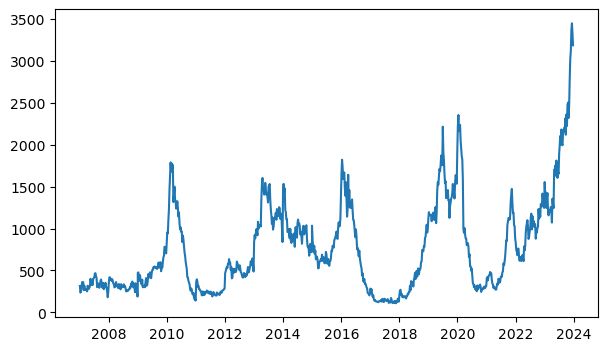

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,4))
plt.plot(df_grouped['DATE'], df_grouped['Casos'])
plt.show()

In [11]:
df_grouped.to_excel('Dengue_processed.xlsx')

In [52]:
# check for Municipio_ocurrencia
files_not_municipio = []
for file in tqdm(files_dengue):
    try:
        df_temp = pd.read_excel(file)
        if 'Municipio_ocurrencia' not in list(df_temp.columns):
            files_not_municipio.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [16:39<00:00, 58.79s/it]


# ZIKA

In [12]:
# read files
folder_path = "Zika"  # Adjust this to your folder path

files_zika = [file_path for file_path in glob.glob(os.path.join(folder_path, "*")) if os.path.isfile(file_path)]

In [13]:
# Assuming files_dengue is a list of file paths to Excel files
dataframes = []
cols_to_keep = ['SEMANA', 'ANO', 'Estado_final_de_caso']

for file in tqdm(files_zika):
    try:
        df_temp = pd.read_excel(file)
        df_temp = df_temp[cols_to_keep]
        dataframes.append(df_temp)
    except Exception as e:
        print(f"Error reading {file}: {e}")

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:35<00:00, 10.65s/it]


In [20]:
# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106803 entries, 0 to 106802
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   SEMANA                106803 non-null  int64
 1   ANO                   106803 non-null  int64
 2   Estado_final_de_caso  106803 non-null  int64
dtypes: int64(3)
memory usage: 2.4 MB


In [26]:
category_counts = df['Estado_final_de_caso'].value_counts()

print(category_counts)

Estado_final_de_caso
4    70391
3     5770
5        7
Name: count, dtype: int64


In [25]:
# Drop casos "Sospecho"
df = df[(df['Estado_final_de_caso']!=2) & (df['Estado_final_de_caso']!=1)] 

In [27]:
df_grouped =df.groupby(['SEMANA', 'ANO'])[['Estado_final_de_caso']].count().reset_index().reset_index()
df_grouped.drop(columns = ['index'], inplace = True)
df_grouped.rename(columns={'Estado_final_de_caso':'Casos'}, inplace = True)
df_grouped.head()

SEMANA   ANO  Casos
0       1  2016   2172
1       1  2017     57
2       1  2018     27
3       1  2019      9
4       1  2020      6

In [28]:
# Create a Date column (setting the first day of the week)
df_grouped["DATE"] = pd.to_datetime(df_grouped["ANO"].astype(str) + "-W" + df_grouped["SEMANA"].astype(str) + "-1", format="%G-W%V-%u")
df_grouped.sort_values(by='DATE', inplace = True)
df_grouped.head()

SEMANA   ANO  Casos       DATE
191      32  2015     26 2015-08-03
199      33  2015     23 2015-08-10
206      34  2015     14 2015-08-17
214      35  2015      6 2015-08-24
221      36  2015      9 2015-08-31

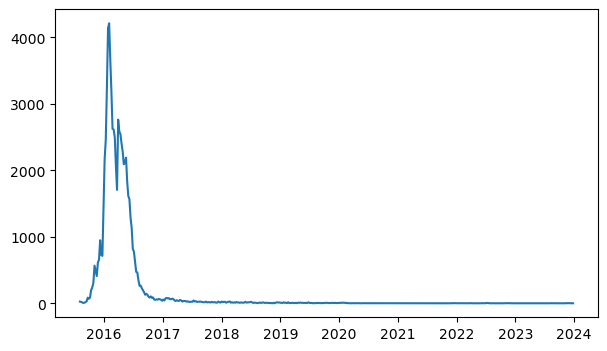

In [29]:
plt.figure(figsize = (7,4))
plt.plot(df_grouped['DATE'], df_grouped['Casos'])
plt.show()

In [30]:
df_grouped.to_excel('Zika_processed.xlsx')

In [54]:
# check for Municipio_ocurrencia
files_not_municipio = []
for file in tqdm(files_zika):
    try:
        df_temp = pd.read_excel(file)
        if 'Municipio_ocurrencia' not in list(df_temp.columns):
            files_not_municipio.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:33<00:00, 10.43s/it]


In [55]:
files_not_municipio

[]

# Chicunguya

In [41]:
# Chicunguya

# read files
folder_path = "Chicunguya"  # Adjust this to your folder path

files_chic = [file_path for file_path in glob.glob(os.path.join(folder_path, "*")) if os.path.isfile(file_path)]

In [42]:
# Assuming files_dengue is a list of file paths to Excel files
dataframes = []
cols_to_keep = ['SEMANA', 'ANO', 'Estado_final_de_caso']

for file in tqdm(files_chic):
    try:
        df_temp = pd.read_excel(file)
        df_temp = df_temp[cols_to_keep]
        dataframes.append(df_temp)
    except Exception as e:
        print(f"Error reading {file}: {e}")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.25s/it]


In [43]:
# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79099 entries, 0 to 79098
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   SEMANA                79099 non-null  int64
 1   ANO                   79099 non-null  int64
 2   Estado_final_de_caso  79099 non-null  int64
dtypes: int64(3)
memory usage: 1.8 MB


In [45]:
category_counts = df['Estado_final_de_caso'].value_counts()

print(category_counts)

Estado_final_de_caso
4    72882
3     5261
1      956
Name: count, dtype: int64


In [46]:
# Drop casos "Sospecho"
df = df[(df['Estado_final_de_caso']!=2) & (df['Estado_final_de_caso']!=1)] 

In [47]:
df_grouped =df.groupby(['SEMANA', 'ANO'])[['Estado_final_de_caso']].count().reset_index().reset_index()
df_grouped.drop(columns = ['index'], inplace = True)
df_grouped.rename(columns={'Estado_final_de_caso':'Casos'}, inplace = True)
df_grouped.head()

SEMANA   ANO  Casos
0       1  2015   2164
1       1  2016    667
2       1  2017     46
3       1  2018     16
4       1  2019     13

In [48]:
# Create a Date column (setting the first day of the week)
df_grouped["DATE"] = pd.to_datetime(df_grouped["ANO"].astype(str) + "-W" + df_grouped["SEMANA"].astype(str) + "-1", format="%G-W%V-%u")
df_grouped.sort_values(by='DATE', inplace = True)
df_grouped.head()

SEMANA   ANO  Casos       DATE
171      23  2014     13 2014-06-02
181      24  2014     10 2014-06-09
191      25  2014      8 2014-06-16
201      26  2014      6 2014-06-23
210      27  2014      8 2014-06-30

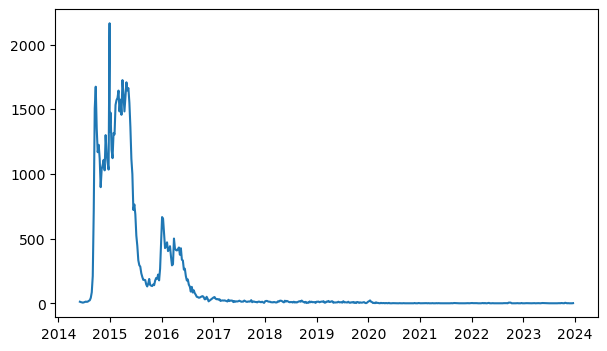

In [49]:
plt.figure(figsize = (7,4))
plt.plot(df_grouped['DATE'], df_grouped['Casos'])
plt.show()

In [50]:
df_grouped.to_excel('Chicunguya_processed.xlsx')

In [56]:
# check for Municipio_ocurrencia
files_not_municipio = []
for file in tqdm(files_chic):
    try:
        df_temp = pd.read_excel(file)
        if 'Municipio_ocurrencia' not in list(df_temp.columns):
            files_not_municipio.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.38s/it]


In [57]:
files_not_municipio

[]

# Varicela

In [2]:
# Varicela
# read files
folder_path = "Varicela"  # Adjust this to your folder path

files_var = [file_path for file_path in glob.glob(os.path.join(folder_path, "*")) if os.path.isfile(file_path)]
files_var

['Varicela\\Datos_2007_831.xls',
 'Varicela\\Datos_2008_831.xls',
 'Varicela\\Datos_2009_831.xlsx',
 'Varicela\\Datos_2010_831.xlsx',
 'Varicela\\Datos_2011_831.xlsx',
 'Varicela\\Datos_2012_831.xlsx',
 'Varicela\\Datos_2013_831.xlsx',
 'Varicela\\Datos_2014_831.xlsx',
 'Varicela\\Datos_2015_831.xlsx',
 'Varicela\\Datos_2016_831.xlsx',
 'Varicela\\Datos_2017_831.xlsx',
 'Varicela\\Datos_2018_831.xlsx',
 'Varicela\\Datos_2019_831.xlsx',
 'Varicela\\Datos_2020_831.xls',
 'Varicela\\Datos_2021_831.xls',
 'Varicela\\Datos_2022_831.xls',
 'Varicela\\Datos_2023_831.xlsx']

In [3]:
dataframes = []
cols_to_keep = ['SEMANA', 'ANO', 'Estado_final_de_caso']

for file in tqdm(files_var):
    try:
        df_temp = pd.read_excel(file)
        df_temp = df_temp[cols_to_keep]
        dataframes.append(df_temp)
    except Exception as e:
        print(f"Error reading {file}: {e}")

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [16:47<00:00, 59.27s/it]


In [4]:
# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202828 entries, 0 to 1202827
Data columns (total 3 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   SEMANA                1202828 non-null  int64
 1   ANO                   1202828 non-null  int64
 2   Estado_final_de_caso  1202828 non-null  int64
dtypes: int64(3)
memory usage: 27.5 MB


In [6]:
category_counts = df['Estado_final_de_caso'].value_counts()

print(category_counts)

Estado_final_de_caso
4    1188407
5      14421
Name: count, dtype: int64


In [7]:
# Drop casos "Sospecho"
df = df[(df['Estado_final_de_caso']!=2) & (df['Estado_final_de_caso']!=1)] 

In [8]:
df_grouped =df.groupby(['SEMANA', 'ANO'])[['Estado_final_de_caso']].count().reset_index().reset_index()
df_grouped.drop(columns = ['index'], inplace = True)
df_grouped.rename(columns={'Estado_final_de_caso':'Casos'}, inplace = True)
df_grouped.head()

SEMANA   ANO  Casos
0       1  2007    250
1       1  2008    515
2       1  2009   1499
3       1  2010   1031
4       1  2011   1666

In [9]:
# Create a Date column (setting the first day of the week)
df_grouped["DATE"] = pd.to_datetime(df_grouped["ANO"].astype(str) + "-W" + df_grouped["SEMANA"].astype(str) + "-1", format="%G-W%V-%u")
df_grouped.sort_values(by='DATE', inplace = True)
df_grouped.head()

SEMANA   ANO  Casos       DATE
0        1  2007    250 2007-01-01
17       2  2007    307 2007-01-08
34       3  2007    301 2007-01-15
51       4  2007    266 2007-01-22
68       5  2007    357 2007-01-29

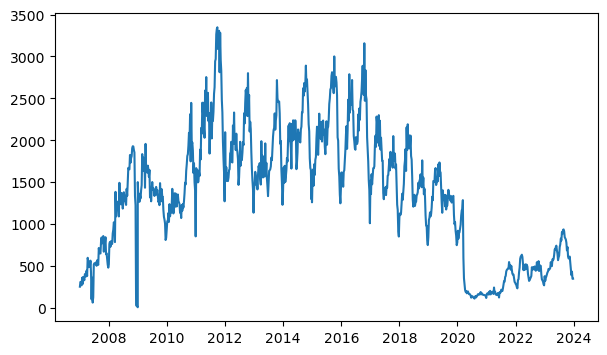

In [12]:
plt.figure(figsize = (7,4))
plt.plot(df_grouped['DATE'], df_grouped['Casos'])
plt.show()

In [13]:
df_grouped.to_excel('Varicela_processed.xlsx', index = False)